# Latent Semantic Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
%autosave 120

Autosaving every 120 seconds


In [2]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.parsing.preprocessing import preprocess_string

In [3]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

def clean(x):
    x = clean_text(x)
    x = clean_numbers(x)
    return x

In [4]:
from pathlib import Path
from bs4 import BeautifulSoup

def load_articles(data_dir):
    reuters = Path(data_dir)
    for path in reuters.glob('*.sgm'):
        with path.open() as sgm_file:
            contents = sgm_file.read()
            soup = BeautifulSoup(contents)
            for article in soup.find_all('body'):
                yield article.text

In [5]:
def load_documents(document_dir):
    print(f'Loading from {document_dir}')
    documents = list(load_articles(document_dir))
    print(f'Loaded {len(documents)} documents')
    return documents

def prepare_documents(documents):
    print('Preparing documents')
    documents = [clean(document) for document in documents]
    documents = [preprocess_string(doc) for doc in documents]
    return documents

def create_lsa_model(documents, dictionary, number_of_topics):
    print(f'Creating LSA Model with {number_of_topics} topics')
    document_terms = [dictionary.doc2bow(doc) for doc in documents]
    return LsiModel(document_terms, 
                    num_topics=number_of_topics, 
                    id2word = dictionary)

def run_lsa_process(documents, number_of_topics=10):
    documents = prepare_documents(documents)
    dictionary = corpora.Dictionary(documents)
    lsa_model = create_lsa_model(documents, dictionary,
                                 number_of_topics)
    return documents, dictionary, lsa_model

In [6]:
document_dir ='data/reuters'
articles = list(load_articles(document_dir))
documents, dictionary, model = run_lsa_process(articles, number_of_topics=8)

Preparing documents
Creating LSA Model with 8 topics


In [7]:
model.print_topics()

[(0,
  '0.647*"said" + 0.282*"dlr" + 0.265*"mln" + 0.216*"pct" + 0.193*"year" + 0.165*"bank" + 0.144*"billion" + 0.141*"reuter" + 0.122*"compani" + 0.117*"market"'),
 (1,
  '-0.676*"mln" + -0.398*"dlr" + 0.334*"said" + -0.186*"ct" + -0.165*"net" + -0.157*"loss" + -0.154*"shr" + 0.119*"bank" + 0.105*"market" + -0.092*"profit"'),
 (2,
  '0.597*"pct" + 0.358*"billion" + -0.333*"said" + 0.316*"bank" + -0.193*"compani" + 0.189*"year" + -0.172*"share" + 0.157*"rate" + -0.100*"stock" + 0.099*"januari"'),
 (3,
  '-0.687*"bank" + 0.482*"pct" + 0.143*"price" + 0.134*"year" + -0.123*"debt" + -0.117*"loan" + -0.112*"dlr" + -0.101*"billion" + 0.101*"product" + 0.091*"compani"'),
 (4,
  '-0.568*"dlr" + 0.406*"mln" + 0.383*"nil" + -0.304*"billion" + -0.172*"share" + -0.144*"compani" + 0.127*"market" + 0.124*"tonn" + 0.107*"ct" + 0.104*"shr"'),
 (5,
  '0.863*"nil" + 0.264*"dlr" + 0.205*"billion" + -0.200*"mln" + 0.160*"prev" + -0.095*"pct" + 0.090*"total" + -0.065*"ct" + 0.059*"name" + 0.058*"unnam"')

In [ ]:
model

## Coherence Model

In [13]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, 
                                     texts=documents, 
                                     dictionary=dictionary, 
                                     coherence='c_v')
    return coherence_model.get_coherence()

def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        documents, dictionary, model = run_lsa_process(articles, 
                                                       number_of_topics=num_topics)
        coherence = calculate_coherence_score(documents, 
                                              dictionary, 
                                              model)
        yield coherence

In [14]:
min_topics, max_topics = 20,40
coherence_scores = list(get_coherence_values(min_topics, max_topics))


Calculating coherence for 20 topics
Preparing documents
Creating LSA Model with 20 topics

Calculating coherence for 21 topics
Preparing documents
Creating LSA Model with 21 topics

Calculating coherence for 22 topics
Preparing documents
Creating LSA Model with 22 topics

Calculating coherence for 23 topics
Preparing documents
Creating LSA Model with 23 topics

Calculating coherence for 24 topics
Preparing documents
Creating LSA Model with 24 topics

Calculating coherence for 25 topics
Preparing documents
Creating LSA Model with 25 topics

Calculating coherence for 26 topics
Preparing documents
Creating LSA Model with 26 topics

Calculating coherence for 27 topics
Preparing documents
Creating LSA Model with 27 topics

Calculating coherence for 28 topics
Preparing documents
Creating LSA Model with 28 topics

Calculating coherence for 29 topics
Preparing documents
Creating LSA Model with 29 topics

Calculating coherence for 30 topics
Preparing documents
Creating LSA Model with 30 topics

In [17]:
documents

[['shower',
  'continu',
  'week',
  'bahia',
  'cocoa',
  'zone',
  'allevi',
  'drought',
  'earli',
  'januari',
  'improv',
  'prospect',
  'come',
  'temporao',
  'normal',
  'humid',
  'level',
  'restor',
  'comissaria',
  'smith',
  'said',
  'weekli',
  'review',
  'dry',
  'period',
  'mean',
  'temporao',
  'late',
  'year',
  'arriv',
  'week',
  'end',
  'februari',
  'bag',
  'kilo',
  'make',
  'cumul',
  'total',
  'season',
  'mln',
  'stage',
  'year',
  'cocoa',
  'deliv',
  'earlier',
  'consign',
  'includ',
  'arriv',
  'figur',
  'comissaria',
  'smith',
  'said',
  'doubt',
  'old',
  'crop',
  'cocoa',
  'avail',
  'harvest',
  'practic',
  'come',
  'end',
  'total',
  'bahia',
  'crop',
  'estim',
  'mln',
  'bag',
  'sale',
  'stand',
  'mln',
  'thousand',
  'bag',
  'hand',
  'farmer',
  'middlemen',
  'export',
  'processor',
  'doubt',
  'cocoa',
  'fit',
  'export',
  'shipper',
  'experienc',
  'dificulti',
  'obtain',
  'bahia',
  'superior',
  'certi

## Plot

In [15]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('fivethirtyeight')

%matplotlib inline

Text(0.5, 1.0, 'Coherence Scores by number of Topics')

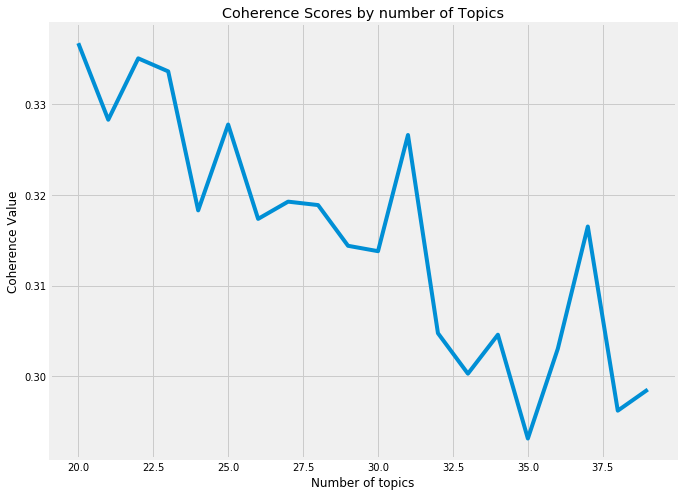

In [16]:
x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,8))
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores by number of Topics')